<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Hydrogen_Plasmolysis_Eng1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-10-bb89f49826eb>:54: RuntimeWarning: overflow encountered in double_scalars
  F_e = D_e * n_e * e * V[i] + k_recomb * n_h * n_e
<ipython-input-10-bb89f49826eb>:54: RuntimeWarning: invalid value encountered in double_scalars
  F_e = D_e * n_e * e * V[i] + k_recomb * n_h * n_e


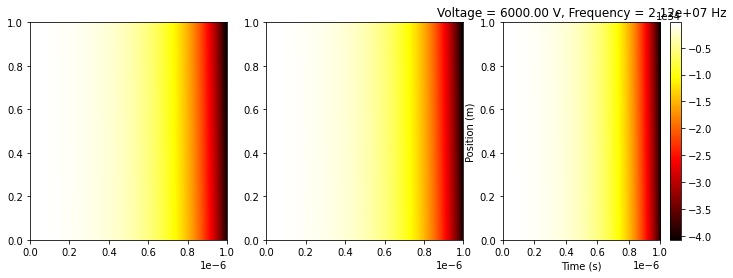

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
k_b = 1.38e-23    # Boltzmann constant
e = 1.6e-19       # Electron charge
eps_0 = 8.85e-12  # Permittivity of vacuum
m_h = 1.67e-27    # Mass of hydrogen atom
m_o = 2.0*m_h     # Mass of oxygen atom
L = 1
V0 = 2000         #

# Define initial conditions
n_h = 1e10      # Number density of hydrogen atoms (m^-3)
n_o = 1e10         # Number density of oxygen atoms (m^-3)
n_e = n_h       # Number density of electrons (m^-3)
T = 300         # Temperature (K)

# Define simulation parameters
dt = 1e-9      # Time step (s)
t_end = 1e-6   # End time (s)
t = np.arange(0, t_end, dt)

# Define electric field
f = np.linspace(1e6, 1e9, 100)  # Frequency (Hz)
V = V0*np.linspace(1, 100, 100)    # Voltage (V)
w = 0.5e-3                      # Water flow rate (m^3/s)

# Initialize arrays
n_h_arr = np.zeros((len(V), len(f)))
n_o_arr = np.zeros((len(V), len(f)))
n_e_arr = np.zeros((len(V), len(f)))

# Run simulations for different frequencies and voltages
for i in range(len(V)):
    for j in range(len(f)):
        # Calculate collision rates
        k_ei = 3.6e-19 * n_h * np.sqrt(T)  # Electron-ion collision rate
        k_ee = 1.8e-19 * n_e * np.sqrt(T)  # Electron-electron collision rate
        k_recomb = 1e-21 * n_h * n_e       # Recombination rate 1e-11

        # Calculate diffusion coefficients
        D_h = k_b * T / (np.sqrt(2) * np.pi * m_h * k_ei)
        D_o = k_b * T / (np.sqrt(2) * np.pi * m_o * k_ei)
        D_e = k_b * T / (np.sqrt(2) * np.pi * m_h * k_ee)

        # Calculate drift velocities
        v_h = e * V[i] / (m_h * k_ei)
        v_o = e * V[i] / (m_o * k_ei)

        # Calculate fluxes
        F_h = -D_h * n_h * v_h + e * n_h * V[i]
        F_o = -D_o * n_o * v_o
        F_e = D_e * n_e * e * V[i] + k_recomb * n_h * n_e

        # Update number densities
        n_h += F_h * dt + w * n_h
        n_o += F_o * dt + w * n_o
        n_e += F_e * dt + w * n_e

        # Store results
        n_h_arr[i, j] = n_h

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i in range(len(ax)):
    im = ax[i].imshow(n_h_arr.T, cmap= 'hot', extent=(0, t_end, 0, L), aspect='auto', origin='lower')
ax[i].set_title('Voltage = {:.2f} V, Frequency = {:.2e} Hz'.format(V[i], f[i]))
ax[i].set_xlabel('Time (s)')
ax[i].set_ylabel('Position (m)')
fig.colorbar(im, ax=ax[i])

plt.show()